Control charts

In [ ]:
# Import the dataset
data = pd.read_csv('')
print(data.shape)
data.head()

In [ ]:
# Create dataset
data=pd.DataFrame(np.array([]))
data.columns=['value']
data['time']=np.arange(1,41,1)
print(data.shape)
data.head()

In [ ]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['x5'], linestyle='none', marker='o', label = 'x5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# Create Batch variable on 4 batches
data['Batch'] = np.tile(np.arange(1, 5), int(len(data)/4)) #tile the simple batches

In [ ]:
# Scatterplot of value VS batch
plt.scatter(data['Batch'], data[''])
plt.xlabel('Batch')
plt.ylabel('')
plt.title('Scatterplot of value VS Batch')
plt.show()

In [ ]:
# Stack data into single column
#data_stack = data.stack() 

# if tuple and need to remove part of it
data_stack = data.transpose().melt()
# Remove unnecessary columns
data_stack = data_stack.drop('variable', axis=1)

In [ ]:
# Plot the data first
plt.plot(data_stack[''], color='b', linestyle='--', marker='o')
plt.show()

In [ ]:
# Normality assumption assuming all from same population
# shapiro-wilk test
_, p_value_SW = stats.shapiro(data['value'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)
# QQ-plot
stats.probplot(data['value'], dist="norm", plot=plt)
plt.show()


# assumption of random data
_, pval_runs = runstest_1samp(data['value'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['value'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['value'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [ ]:
# Break single column data in different samples
m=10   #number of trays
n=4    #elements per tray
data=np.array(data['value']).reshape(m,n)
data=pd.DataFrame(data)
data.head()

XbarR

In [ ]:
# Create the control chart with the data
data_XR = qda.ControlCharts.XbarR(data)

In [ ]:
# with different alpha/k
ARL0=200
alpha = 1/ARL0
K_alpha = stats.norm.ppf(1-alpha/2)
data_XR_alpha = qda.ControlCharts.XbarR(data, K = K_alpha)

Operating curves

In [ ]:
# Operating characteristic curve

n= 
# Define a range of values for beta
#delta = np.linspace(0, 4, 100)
delta = np.arange(0, 5, 0.1)
# Compute the corresponding beta values
beta = stats.norm.cdf(K_alpha - delta*np.sqrt(n)) - stats.norm.cdf(-K_alpha - delta*np.sqrt(n))

# Plot the beta values
plt.plot(delta, beta)
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

In [ ]:
# to get type II error corresponding to specific beta
print(beta[np.where(delta==2)])

In [ ]:
# if individual and delta on coefficient b1 of model at different times

delta = np.arange(0, 5, 0.1)
time=[5,10]

beta1=stats.norm.cdf(K_alpha-delta*time[0])-stats.norm.cdf(-K_alpha-delta*time[0])
beta2=stats.norm.cdf(K_alpha-delta*time[1])-stats.norm.cdf(-K_alpha-delta*time[1])

# Plot the beta values
plt.plot(delta, beta1)
plt.plot(delta,beta2)
plt.legend(['time=5','Time=10'])
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

In [ ]:
# Average run length ARL
#under H1 ooc hypothesis
ARL1 = 1/(1-beta)
#under in control would be 1/alpha

# Plot the ARL values
plt.plot(delta, ARL1)
plt.xlabel('Delta')
plt.ylabel('ARL')
plt.title('Average run length')
plt.show()

In [ ]:
#if want to find where min n remenber to add starting n (ex n=np.arange(2,21,1))
h=4   #hours
c1=2
c2=15
cost=c1*n+c2*h*ARL1
print(np.argmin(cost)+2)

In [ ]:
h=2       #hours

ATS=h*(1/(1-beta))

# Plot the ATS values
plt.plot(delta, ATS)
plt.xlabel('Delta')
plt.ylabel('ATS')
plt.legend(['n=5'])
plt.title('Average Time to Signal')
plt.show()

In [ ]:
# Operating characteristic curve
n=np.arange(2, 21, 1)

delta = [1, 2]
# Compute the corresponding beta values
beta1 = stats.norm.cdf(K_alpha - delta[0]*np.sqrt(n)) - stats.norm.cdf(-K_alpha - delta[0]*np.sqrt(n))
beta2 = stats.norm.cdf(K_alpha - delta[1]*np.sqrt(n)) - stats.norm.cdf(-K_alpha - delta[1]*np.sqrt(n))

ATS1=h*(1/(1-beta1))
ATS2=h*(1/(1-beta2))

# Plot the ATS values
plt.plot(n, ATS1)
plt.plot(n, ATS2)
plt.xlabel('n')
plt.ylabel('ATS')
plt.legend(['delta=1','delta=2'])
plt.title('Average Time to Signal')
plt.show()

I-MR

In [ ]:
data_IMR = qda.ControlCharts.IMR(data, '')

In [ ]:
# find the index of the I_TEST1 column different from NaN -> ooc value index
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]

print('The index of the OOC point is: {}'.format(OOC_idx))

In [ ]:
# New control chart without ooc value
#only if assignable cause, iterative procedure

data_2 = data.copy()
# replace the OOC point with NaN
data_2[''].iloc[OOC_idx] = np.nan
# Plot the new control chart
data_IMR_2 = qda.ControlCharts.IMR(data_2, '')

Determine if values in new_obs are in control

In [ ]:
# Add new observations to dataset
new_data = pd.concat([data, pd.DataFrame(new_obs, columns=[''])], ignore_index=True)
new_data.tail(10)

In [ ]:
new_data_IMR = qda.ControlCharts.IMR(new_data, '', subset_size=len(data))
#chart built only on old data, but new data plotted to see if in control
#black dotted line to separate old and new obs

Xbar-S

In [ ]:
# X-bar and S charts
data_XS = qda.ControlCharts.XbarS(data)

MANUALLY

XbarR

In [ ]:
# Make a copy of the data
data_XR = data.copy()
# Add a column with the mean of the rows
data_XR['sample_mean'] = data.mean(axis=1)
# Add a column with the range of the rows
data_XR['sample_range'] = data.max(axis=1) - data.min(axis=1)

# Inspect the dataset
data_XR.head()

In [ ]:
Xbar_mean = data_XR['sample_mean'].mean()    #grand mean
R_mean = data_XR['sample_range'].mean()

print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % R_mean)

In [ ]:
alpha = 0.002
K_alpha = stats.norm.ppf(1-alpha/2)

# Vd tabella alla fine per valori
n = 5
A2 = 0.577
D3 = 0
D4 = 2.114

In [ ]:
# Now we can compute the CL, UCL and LCL for Xbar and R
data_XR['Xbar_CL'] = Xbar_mean
data_XR['Xbar_UCL'] = Xbar_mean + A2 * R_mean
data_XR['Xbar_LCL'] = Xbar_mean - A2 * R_mean

data_XR['R_CL'] = R_mean
data_XR['R_UCL'] = D4 * R_mean
data_XR['R_LCL'] = D3 * R_mean

data_XR['Xbar_TEST1'] = np.where((data_XR['sample_mean'] > data_XR['Xbar_UCL']) | 
                (data_XR['sample_mean'] < data_XR['Xbar_LCL']), data_XR['sample_mean'], np.nan)
data_XR['R_TEST1'] = np.where((data_XR['sample_range'] > data_XR['R_UCL']) | 
                (data_XR['sample_range'] < data_XR['R_LCL']), data_XR['sample_range'], np.nan)

In [ ]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XR['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['Xbar_UCL'], color='r')
plt.plot(data_XR['Xbar_CL'], color='g')
plt.plot(data_XR['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

In [ ]:
# Plot the R chart
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

In [ ]:
# Estimate sigma_hat through R statistic
d2 = qda.constants.getd2(n)  #to get d2
sigma_hat = R_mean / d2
print('Sigma_hat = %.3f' % sigma_hat)

# Estimate confidence interval (control limits) 
CI = stats.norm.interval(1-alpha, loc=Xbar_mean, scale=sigma_hat/np.sqrt(n))
print('CI = (%.3f, %.3f)' % CI)

I-MR

In [ ]:
# Compute the moving ranges using the diff function
data['MR'] = data[''].diff().abs()
data.head()

In [ ]:
# Define the control limits
d2 = qda.constants.getd2(n)
D4 = qda.constants.getD4(n)

# make a copy of the data
df = data.copy()
# change the name of the column time to I
df.rename(columns={'':'I'}, inplace=True)

df.head()

In [ ]:
# Create columns for the upper and lower control limits
df['I_UCL'] = df['I'].mean() + (K_alpha*df['MR'].mean()/d2)
df['I_CL'] = df['I'].mean()
df['I_LCL'] = df['I'].mean() - (K_alpha*df['MR'].mean()/d2)
df['MR_UCL'] = D4 * df['MR'].mean()
df['MR_CL'] = df['MR'].mean()
df['MR_LCL'] = 0
# Define columns for possible violations of the control limits
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | 
                (df['I'] < df['I_LCL']), df['I'], np.nan)
df['MR_TEST1'] = np.where((df['MR'] > df['MR_UCL']) | 
                (df['MR'] < df['MR_LCL']), df['MR'], np.nan)

df.head()

In [ ]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.2f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

In [ ]:
# MR chart
plt.title('MR chart')
plt.plot(df['MR'], color='b', linestyle='--', marker='o')
plt.plot(df['MR_UCL'], color='r')
plt.plot(df['MR_CL'], color='g')
plt.plot(df['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_CL'].iloc[0], 'CL = {:.2f}'.format(df['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

Xbar-S

In [ ]:
# Make a copy of the data
data_XS = data.copy()
# Add a column with the mean of the rows
data_XS['sample_mean'] = data_BC_unstack.mean(axis=1)
# Add a column with the range of the rows
data_XS['sample_std'] = data_BC_unstack.std(axis=1)

data_XS.head()

In [ ]:
Xbar_mean = data_XS['sample_mean'].mean()
S_mean = data_XS['sample_std'].mean()

print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % S_mean)

In [ ]:
n = 5
K = 3
A3 = K * 1 / (qda.constants.getc4(n) * np.sqrt(n))
B3 = np.maximum(1 - K * (np.sqrt(1-qda.constants.getc4(n)**2)) / (qda.constants.getc4(n)), 0)
B4 = 1 + K * (np.sqrt(1-qda.constants.getc4(n)**2)) / (qda.constants.getc4(n))

# Now we can compute the CL, UCL and LCL for Xbar and S
data_XS['Xbar_CL'] = Xbar_mean
data_XS['Xbar_UCL'] = Xbar_mean + A3 * S_mean
data_XS['Xbar_LCL'] = Xbar_mean - A3 * S_mean
data_XS['S_CL'] = S_mean
data_XS['S_UCL'] = B4 * S_mean
data_XS['S_LCL'] = B3 * S_mean
data_XS['Xbar_TEST1'] = np.where((data_XS['sample_mean'] > data_XS['Xbar_UCL']) | 
                (data_XS['sample_mean'] < data_XS['Xbar_LCL']), data_XS['sample_mean'], np.nan)
data_XS['S_TEST1'] = np.where((data_XS['sample_std'] > data_XS['S_UCL']) | 
                (data_XS['sample_std'] < data_XS['S_LCL']), data_XS['sample_std'], np.nan)
data_XS.head()

In [ ]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XS['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['Xbar_UCL'], color='r')
plt.plot(data_XS['Xbar_CL'], color='g')
plt.plot(data_XS['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

In [ ]:
# Plot the S chart
plt.title('S chart')
plt.plot(data_XS['sample_std'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['S_UCL'], color='r')
plt.plot(data_XS['S_CL'], color='g')
plt.plot(data_XS['S_LCL'], color='r')
plt.ylabel('Sample S')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['S_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['S_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['S_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['S_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['S_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

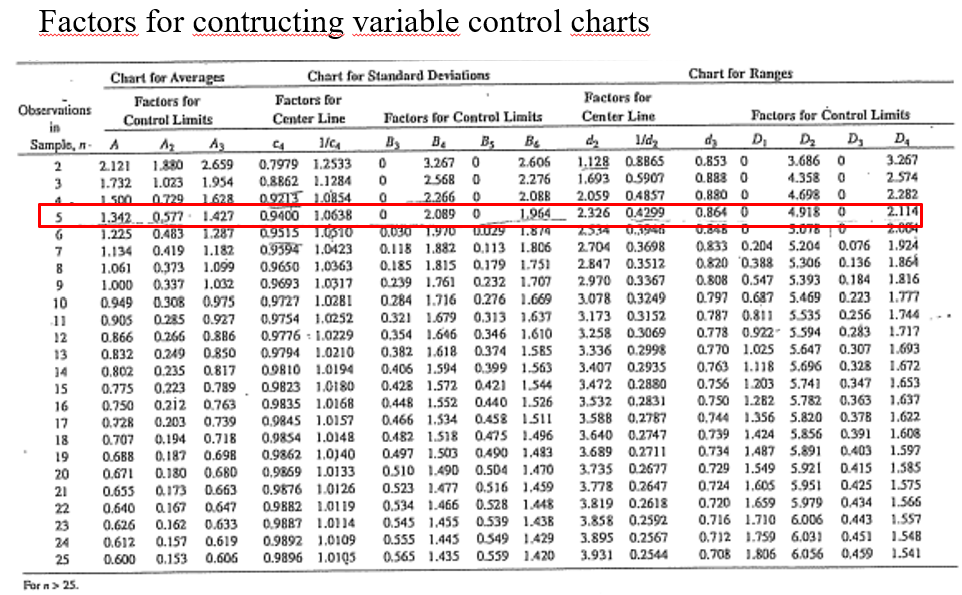

In [ ]:
# Calculate power of Xbar-S chart

mu0=100
sigma0=9.5
delta=10
lam=0.5*delta
K=3
alpha=0.0027
n=5
mu1=mu0+delta
sigma1=lam*sigma0

pow_Xbar=stats.norm.cdf((K*sigma0/np.sqrt(n)-delta)/(sigma1/np.sqrt(n)))-stats.norm.cdf((-K*sigma0/np.sqrt(n)-delta)/(sigma1/np.sqrt(n)))
print(pow_Xbar)
pow_S=stats.chi2.cdf(stats.chi2.ppf(1-alpha/2,n-1)/lam**2,n-1)-stats.chi2.cdf(stats.chi2.ppf(alpha/2,n-1)/lam**2,n-1)
print(pow_S)

power=1-pow_Xbar*pow_S
print(power)